In [1]:
import pandas as pd
df = pd.read_csv("breast cancer classification dataset.csv")
#df.head(10)

# Getting the rows and column count in the dataset
df.shape  # patients(rows) = 569 and features(columns)=33

# Getting the total number of empty values in each column
df.isna().sum()

# Droping the "Unnamed: 32" column
df = df.drop('Unnamed: 32', axis= 'columns')

#df.head()

# new Shape
df.shape # dropped one column

# Handling the Missing values
import math 
median_radius = math.floor(df.radius_mean.median())
#print(median_radius)

df.radius_mean = df.radius_mean.fillna(median_radius) #inserting values to NaN of radius_mean
#df.head()


median_fractal_dimension_worst = math.floor(df.fractal_dimension_worst.median())
#print(median_fractal_dimension_worst)


df.fractal_dimension_worst = df.fractal_dimension_worst.fillna(median_fractal_dimension_worst) 

df.isna().sum() # no NaN values 

#Using One Hot Encoding in the diagnosis column
dummies= pd.get_dummies(df.diagnosis)
#dummies.head()


# concatanating these columns in the original dataframe
merged = pd.concat([df, dummies], axis='columns')  
#merged.head(20)


# droping the diagnosis and B columns
final_data_frame = merged.drop(['diagnosis', 'B'], axis='columns')
#final_data_frame.head(20)


final_data_frame = final_data_frame.drop('id', axis= 'columns') 
#final_data_frame.head(10)


#final_data_frame.tail(10)


#Split the dataset into features and labels
X = final_data_frame.drop('M', axis= 'columns')
y = final_data_frame['M']
#X.head(5)
#y.head(5)
#y.tail(5)

#Scaling the Input Columns only
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
#X_scaled_df.head(5)


X = X_scaled_df.copy()
X.head(5)

#y.head(5)




,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.284869,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.573012
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.000000
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.422072
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.833735
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.370024


In [2]:
#Spilitng the dataset to train test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2, random_state=1)

In [3]:
X.shape

(569, 30)

In [4]:
X_train.shape

(455, 30)

In [5]:
y.shape

(569,)

In [6]:
y_train.shape

(455,)

In [7]:
#Importing the model LogisticRegression 
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(X_train, y_train)

LogisticRegression()

In [8]:
from sklearn.metrics import accuracy_score
y_pred = model1.predict(X_test) 
acc1 = accuracy_score(y_pred, y_test)
acc1

0.956140350877193

In [9]:
#Importing the model DecisionTreeClassifier
from sklearn import tree
model2 = tree.DecisionTreeClassifier()
model2.fit(X_train, y_train)

DecisionTreeClassifier()

In [10]:
y_pred = model2.predict(X_test) 
acc2 = accuracy_score(y_pred, y_test)
acc2

0.9385964912280702

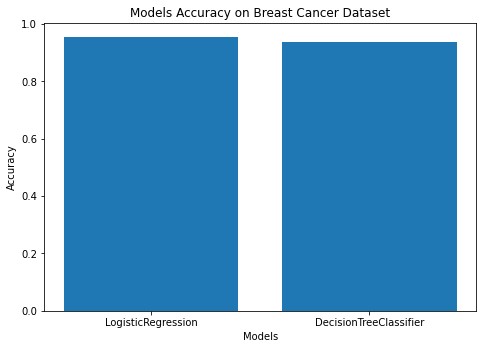

In [11]:
#Ploting the accuracy

import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
mdl = ['LogisticRegression', 'DecisionTreeClassifier']
acc = [acc1, acc2]
ax.bar(mdl,acc)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Models Accuracy on Breast Cancer Dataset")
plt.show()